## **Brain tumor detection and classification using machine learning**

**Importing Necessary libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

**Loading and exploring the dataset**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/braintumor (1).csv')

In [ ]:
df.head()

,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at,class
0,-156,-115,-140,149,-111,-334,-47,-204,-148,377,...,1483,-10,182,-16,472,1,27,51,-27,medulloblastoma
1,16,-63,-89,92,-394,-719,290,-132,238,141,...,2490,-66,-151,-280,1484,165,56,328,-61,medulloblastoma
2,34,-81,163,110,-230,-353,158,-114,-11,66,...,1742,154,445,-57,784,379,-58,36,-77,medulloblastoma
3,-72,-58,60,170,-117,-328,264,-71,-2,55,...,1042,-23,130,-88,605,319,28,-51,-80,medulloblastoma
4,-552,-212,-191,374,-50,-404,-399,-61,-219,-6,...,84,-961,-712,-741,842,91,-627,-563,-751,medulloblastoma


In [ ]:
df.dtypes

AFFX-BioB-5_at     int64
AFFX-BioB-M_at     int64
AFFX-BioB-3_at     int64
AFFX-BioC-5_at     int64
AFFX-BioC-3_at     int64
                   ...  
Z17240_at          int64
L49218_f_at        int64
M71243_f_at        int64
Z78285_f_at        int64
class             object
Length: 7130, dtype: object

In [ ]:
df.shape

(40, 7130)

In [ ]:
df.describe()

,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
count,40.00000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,...,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000,40.00000
mean,-255.47500,-266.075000,-10.325000,240.450000,-378.025000,-721.600000,156.075000,-292.400000,8.950000,18.600000,...,219.650000,2981.225000,-218.650000,398.725000,-248.575000,1905.100000,637.250000,-147.80000,136.875000,-226.50000
std,386.58863,319.380441,282.397191,222.069976,244.715899,431.468381,866.059908,218.082295,167.329852,418.634888,...,259.001094,1595.307277,493.632145,889.683493,371.023041,2081.005327,765.648033,315.54781,409.906317,342.95705
min,-1969.00000,-1688.000000,-474.000000,-43.000000,-972.000000,-2218.000000,-2475.000000,-798.000000,-235.000000,-1152.000000,...,-413.000000,84.000000,-2156.000000,-2231.000000,-1850.000000,-782.000000,-1494.000000,-1383.00000,-1604.000000,-1649.00000
25%,-250.75000,-296.750000,-185.500000,89.250000,-548.750000,-1019.000000,-268.500000,-371.750000,-112.000000,-46.500000,...,79.500000,1857.000000,-269.000000,123.250000,-287.250000,462.000000,218.250000,-151.00000,30.250000,-236.50000
50%,-120.50000,-160.500000,-95.000000,166.500000,-295.000000,-577.500000,251.500000,-202.500000,-14.000000,37.500000,...,200.000000,2713.000000,-56.000000,261.500000,-142.000000,1035.500000,383.000000,-43.00000,177.500000,-81.50000
75%,-76.00000,-113.750000,89.500000,374.750000,-189.750000,-402.000000,894.000000,-130.000000,90.000000,169.500000,...,284.500000,3961.250000,9.500000,447.000000,-30.000000,3242.000000,856.250000,27.00000,330.000000,-54.50000
max,34.00000,-4.000000,827.000000,867.000000,-50.000000,-147.000000,1654.000000,-61.000000,471.000000,1206.000000,...,1088.000000,6792.000000,461.000000,2974.000000,134.000000,6960.000000,2509.000000,216.00000,884.000000,-16.00000


In [ ]:
df.count()

AFFX-BioB-5_at    40
AFFX-BioB-M_at    40
AFFX-BioB-3_at    40
AFFX-BioC-5_at    40
AFFX-BioC-3_at    40
                  ..
Z17240_at         40
L49218_f_at       40
M71243_f_at       40
Z78285_f_at       40
class             40
Length: 7130, dtype: int64

In [ ]:
df.isnull().sum()

AFFX-BioB-5_at    0
AFFX-BioB-M_at    0
AFFX-BioB-3_at    0
AFFX-BioC-5_at    0
AFFX-BioC-3_at    0
                 ..
Z17240_at         0
L49218_f_at       0
M71243_f_at       0
Z78285_f_at       0
class             0
Length: 7130, dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.corr()

,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
AFFX-BioB-5_at,1.000000,0.906878,-0.245545,-0.532757,0.378858,0.572471,0.240094,0.233959,0.047515,0.159316,...,-0.165987,-0.036590,0.494985,-0.470233,0.422849,-0.324080,-0.277331,0.526025,0.092615,0.409668
AFFX-BioB-M_at,0.906878,1.000000,-0.362287,-0.571076,0.549256,0.725724,0.230410,0.508479,0.045718,0.226382,...,-0.214167,-0.234878,0.382849,-0.503473,0.326552,-0.452607,-0.388050,0.424675,-0.001856,0.334119
AFFX-BioB-3_at,-0.245545,-0.362287,1.000000,0.215119,-0.358738,-0.459330,0.015811,-0.418981,0.064600,-0.492053,...,-0.197622,0.191384,0.002807,0.302636,0.109662,0.590405,0.475268,0.036508,0.322405,-0.008005
AFFX-BioC-5_at,-0.532757,-0.571076,0.215119,1.000000,-0.589590,-0.597064,-0.029116,-0.342018,0.154985,-0.045473,...,-0.002789,0.230351,-0.034150,0.462502,-0.167788,0.407188,0.371918,-0.126523,0.183678,-0.096795
AFFX-BioC-3_at,0.378858,0.549256,-0.358738,-0.589590,1.000000,0.782442,0.076733,0.581754,-0.152705,0.278282,...,-0.232485,-0.314532,0.168066,-0.400386,0.293289,-0.582039,-0.409899,0.243625,-0.082724,0.252210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X83863_at,-0.324080,-0.452607,0.590405,0.407188,-0.582039,-0.766826,0.166282,-0.551615,0.091616,-0.380180,...,0.152799,0.519348,-0.087635,0.505827,0.001839,1.000000,0.851098,0.017255,0.468230,-0.005185
Z17240_at,-0.277331,-0.388050,0.475268,0.371918,-0.409899,-0.745899,-0.053822,-0.423618,0.056964,-0.156315,...,0.234942,0.486740,0.150653,0.712289,0.259385,0.851098,1.000000,0.274883,0.547593,0.317820
L49218_f_at,0.526025,0.424675,0.036508,-0.126523,0.243625,0.102635,0.197654,-0.018016,0.342979,0.095437,...,-0.082820,0.061080,0.911769,0.186299,0.924153,0.017255,0.274883,1.000000,0.715428,0.937004
M71243_f_at,0.092615,-0.001856,0.322405,0.183678,-0.082724,-0.273125,0.226572,-0.242910,0.446355,-0.127902,...,-0.106222,0.291900,0.689547,0.522403,0.675725,0.468230,0.547593,0.715428,1.000000,0.696128


In [ ]:
df.columns

Index(['AFFX-BioB-5_at', 'AFFX-BioB-M_at', 'AFFX-BioB-3_at', 'AFFX-BioC-5_at',
       'AFFX-BioC-3_at', 'AFFX-BioDn-5_at', 'AFFX-BioDn-3_at',
       'AFFX-CreX-5_at', 'AFFX-CreX-3_at', 'AFFX-BioB-5_st',
       ...
       'U58516_at', 'U73738_at', 'X06956_at', 'X16699_at', 'X83863_at',
       'Z17240_at', 'L49218_f_at', 'M71243_f_at', 'Z78285_f_at', 'class'],
      dtype='object', length=7130)

In [ ]:
#choosing independent variables
x=df.iloc[:,:-1]

In [ ]:
#choosing dependent variables
y=df.iloc[:,-1]

In [ ]:
type(y)

pandas.core.series.Series

In [ ]:
x.describe()

,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
count,40.00000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,...,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000,40.00000
mean,-255.47500,-266.075000,-10.325000,240.450000,-378.025000,-721.600000,156.075000,-292.400000,8.950000,18.600000,...,219.650000,2981.225000,-218.650000,398.725000,-248.575000,1905.100000,637.250000,-147.80000,136.875000,-226.50000
std,386.58863,319.380441,282.397191,222.069976,244.715899,431.468381,866.059908,218.082295,167.329852,418.634888,...,259.001094,1595.307277,493.632145,889.683493,371.023041,2081.005327,765.648033,315.54781,409.906317,342.95705
min,-1969.00000,-1688.000000,-474.000000,-43.000000,-972.000000,-2218.000000,-2475.000000,-798.000000,-235.000000,-1152.000000,...,-413.000000,84.000000,-2156.000000,-2231.000000,-1850.000000,-782.000000,-1494.000000,-1383.00000,-1604.000000,-1649.00000
25%,-250.75000,-296.750000,-185.500000,89.250000,-548.750000,-1019.000000,-268.500000,-371.750000,-112.000000,-46.500000,...,79.500000,1857.000000,-269.000000,123.250000,-287.250000,462.000000,218.250000,-151.00000,30.250000,-236.50000
50%,-120.50000,-160.500000,-95.000000,166.500000,-295.000000,-577.500000,251.500000,-202.500000,-14.000000,37.500000,...,200.000000,2713.000000,-56.000000,261.500000,-142.000000,1035.500000,383.000000,-43.00000,177.500000,-81.50000
75%,-76.00000,-113.750000,89.500000,374.750000,-189.750000,-402.000000,894.000000,-130.000000,90.000000,169.500000,...,284.500000,3961.250000,9.500000,447.000000,-30.000000,3242.000000,856.250000,27.00000,330.000000,-54.50000
max,34.00000,-4.000000,827.000000,867.000000,-50.000000,-147.000000,1654.000000,-61.000000,471.000000,1206.000000,...,1088.000000,6792.000000,461.000000,2974.000000,134.000000,6960.000000,2509.000000,216.00000,884.000000,-16.00000


In [ ]:
len(x.columns)

7129

In [ ]:
y.describe()

count                  40
unique                  5
top       medulloblastoma
freq                   10
Name: class, dtype: object

In [ ]:
pd.value_counts(y)

4    10
3    10
2    10
1     6
0     4
dtype: int64

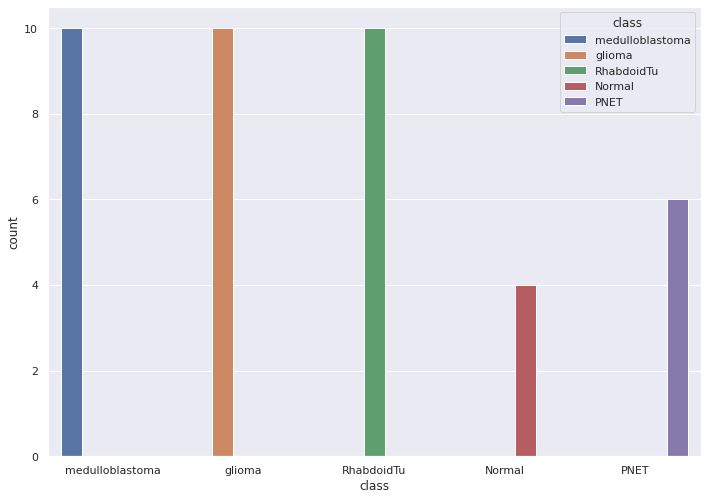

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x ='class', hue = "class", data = df)
plt.show()


In [ ]:
# Encoding the target variable
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

y= label_encoder.fit_transform(y)

y

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)

**XGB Classifier model**

In [ ]:
from xgboost import XGBClassifier
model1=XGBClassifier()

In [ ]:
model1.fit(x_train,y_train)

XGBClassifier(objective='multi:softprob')

In [ ]:
y_pred=model1.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print("Accuracy score for XGB classifier:",score*100)

Accuracy score for XGB classifier: 70.0


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       1.00      0.75      0.86         4
           3       0.67      1.00      0.80         2
           4       1.00      0.50      0.67         4

    accuracy                           0.70        10
   macro avg       0.53      0.45      0.46        10
weighted avg       0.93      0.70      0.77        10



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Func

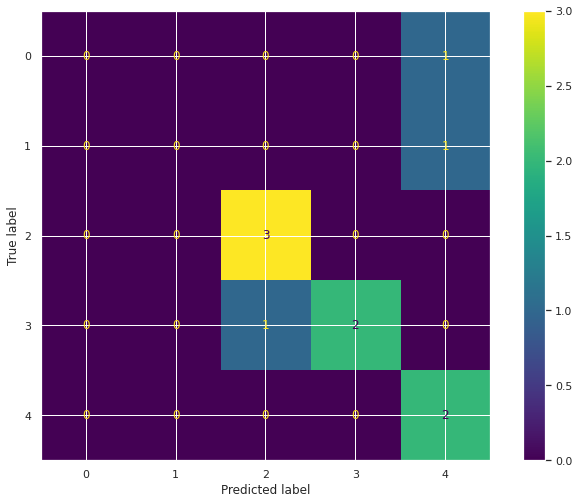

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))
plot_confusion_matrix(model1,x_test,y_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       1.00      0.75      0.86         4
           3       0.67      1.00      0.80         2
           4       1.00      0.50      0.67         4

    accuracy                           0.70        10
   macro avg       0.53      0.45      0.46        10
weighted avg       0.93      0.70      0.77        10



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**corr high features**

In [ ]:
selected_feat_full=x.columns

In [ ]:
selected_feat_full[1]

'AFFX-BioB-M_at'

In [ ]:
# Import those libraries
import pandas as pd
from scipy.stats import pearsonr


# # Apply the pearsonr()
# corr, _ = pearsonr(list1, list2)
# print('Pearsons correlation: %.3f' % corr)

In [ ]:
new_list=[]
for i in range(0,4600):
    corr, _ = pearsonr(x[selected_feat_full[i]], y)
    print('Pearsons correlation: %.3f' % corr,[selected_feat_full[i]])
    new_list.append(corr)

Pearsons correlation: 0.367 ['AFFX-BioB-5_at']
Pearsons correlation: 0.448 ['AFFX-BioB-M_at']
Pearsons correlation: -0.138 ['AFFX-BioB-3_at']
Pearsons correlation: -0.414 ['AFFX-BioC-5_at']
Pearsons correlation: 0.347 ['AFFX-BioC-3_at']
Pearsons correlation: 0.347 ['AFFX-BioDn-5_at']
Pearsons correlation: 0.258 ['AFFX-BioDn-3_at']
Pearsons correlation: 0.273 ['AFFX-CreX-5_at']
Pearsons correlation: -0.153 ['AFFX-CreX-3_at']
Pearsons correlation: 0.054 ['AFFX-BioB-5_st']
Pearsons correlation: 0.227 ['AFFX-BioB-M_st']
Pearsons correlation: 0.343 ['AFFX-BioB-3_st']
Pearsons correlation: 0.312 ['AFFX-BioC-5_st']
Pearsons correlation: 0.399 ['AFFX-BioC-3_st']
Pearsons correlation: -0.178 ['AFFX-BioDn-5_st']
Pearsons correlation: -0.207 ['AFFX-BioDn-3_st']
Pearsons correlation: -0.132 ['AFFX-CreX-5_st']
Pearsons correlation: 0.432 ['AFFX-CreX-3_st']
Pearsons correlation: -0.346 ['hum_alu_at']
Pearsons correlation: -0.197 ['AFFX-DapX-5_at']
Pearsons correlation: -0.117 ['AFFX-DapX-M_at']
Pear

In [ ]:
len(new_list)

4600

In [ ]:
# High corr feature
max(new_list)

0.5910550751774167

In [ ]:
x[selected_feat_full].corr()

,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
AFFX-BioB-5_at,1.000000,0.906878,-0.245545,-0.532757,0.378858,0.572471,0.240094,0.233959,0.047515,0.159316,...,-0.165987,-0.036590,0.494985,-0.470233,0.422849,-0.324080,-0.277331,0.526025,0.092615,0.409668
AFFX-BioB-M_at,0.906878,1.000000,-0.362287,-0.571076,0.549256,0.725724,0.230410,0.508479,0.045718,0.226382,...,-0.214167,-0.234878,0.382849,-0.503473,0.326552,-0.452607,-0.388050,0.424675,-0.001856,0.334119
AFFX-BioB-3_at,-0.245545,-0.362287,1.000000,0.215119,-0.358738,-0.459330,0.015811,-0.418981,0.064600,-0.492053,...,-0.197622,0.191384,0.002807,0.302636,0.109662,0.590405,0.475268,0.036508,0.322405,-0.008005
AFFX-BioC-5_at,-0.532757,-0.571076,0.215119,1.000000,-0.589590,-0.597064,-0.029116,-0.342018,0.154985,-0.045473,...,-0.002789,0.230351,-0.034150,0.462502,-0.167788,0.407188,0.371918,-0.126523,0.183678,-0.096795
AFFX-BioC-3_at,0.378858,0.549256,-0.358738,-0.589590,1.000000,0.782442,0.076733,0.581754,-0.152705,0.278282,...,-0.232485,-0.314532,0.168066,-0.400386,0.293289,-0.582039,-0.409899,0.243625,-0.082724,0.252210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X83863_at,-0.324080,-0.452607,0.590405,0.407188,-0.582039,-0.766826,0.166282,-0.551615,0.091616,-0.380180,...,0.152799,0.519348,-0.087635,0.505827,0.001839,1.000000,0.851098,0.017255,0.468230,-0.005185
Z17240_at,-0.277331,-0.388050,0.475268,0.371918,-0.409899,-0.745899,-0.053822,-0.423618,0.056964,-0.156315,...,0.234942,0.486740,0.150653,0.712289,0.259385,0.851098,1.000000,0.274883,0.547593,0.317820
L49218_f_at,0.526025,0.424675,0.036508,-0.126523,0.243625,0.102635,0.197654,-0.018016,0.342979,0.095437,...,-0.082820,0.061080,0.911769,0.186299,0.924153,0.017255,0.274883,1.000000,0.715428,0.937004
M71243_f_at,0.092615,-0.001856,0.322405,0.183678,-0.082724,-0.273125,0.226572,-0.242910,0.446355,-0.127902,...,-0.106222,0.291900,0.689547,0.522403,0.675725,0.468230,0.547593,0.715428,1.000000,0.696128


**Feature Selection with model**

In [ ]:
from sklearn.svm import LinearSVC

from sklearn.feature_selection import SelectFromModel


lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(x, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(x)
X_new.shape

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


(40, 53)

In [ ]:
model.get_support()

array([False, False, False, ..., False, False, False])

In [ ]:
len(model.get_feature_names_out(x.columns))

53

In [ ]:
Feature_selected_with_model=model.get_feature_names_out(x.columns)

In [ ]:
Feature_selected_with_model

array(['AFFX-HSAC07/X00351_5_at', 'AFFX-M27830_5_at', 'D13639_at',
       'D21267_at', 'D31883_at', 'D76435_at', 'D78611_at', 'HG33-HT33_at',
       'HG3549-HT3751_at', 'HG4319-HT4589_at', 'J03040_at', 'J04164_at',
       'L11373_at', 'L20814_at', 'L41162_at', 'M17733_at', 'M27891_at',
       'M32053_at', 'M83233_at', 'M93426_at', 'M94250_at', 'S45630_at',
       'U09953_at', 'U14968_at', 'U14970_at', 'X05196_at',
       'X13546_rna1_at', 'X13839_at', 'X15880_at', 'X53331_at',
       'X59834_at', 'X66945_at', 'X69111_at', 'X86693_at', 'X86809_at',
       'Z48950_at', 'HG3543-HT3739_at', 'D86974_at', 'M25079_s_at',
       'HG1496-HT1496_s_at', 'X57351_s_at', 'V00594_at', 'X03689_s_at',
       'L04483_s_at', 'X70940_s_at', 'M16364_s_at', 'Z19554_s_at',
       'S37730_s_at', 'D83174_s_at', 'M21388_r_at', 'HG2887-HT3031_at',
       'S72043_rna1_at', 'M34516_at'], dtype=object)

In [ ]:
max(Feature_selected_with_model)

'Z48950_at'

**Feature selection with ANOVA test**

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
select = SelectKBest(f_classif,k=50)
z = select.fit_transform(x,y)
 
print("After selecting best 50 features:", z.shape) 

After selecting best 50 features: (40, 50)


In [ ]:
select.get_feature_names_out()

array(['D21267_at', 'D29013_at', 'D31883_at', 'D63477_at', 'D83542_at',
       'D87463_at', 'D87465_at', 'J04469_at', 'J04615_at', 'L22214_at',
       'L33243_at', 'L35592_at', 'L47738_at', 'L77864_at', 'M16447_at',
       'M33653_at', 'M37400_at', 'M58583_at', 'M96859_at', 'M99063_at',
       'U16296_at', 'U25029_at', 'U39412_at', 'U52827_at', 'U67171_at',
       'U67963_at', 'U76421_at', 'U79245_at', 'U79288_at', 'U79289_at',
       'U90902_at', 'X05196_at', 'X13227_at', 'X14968_at',
       'X51956_rna1_at', 'X63578_rna1_at', 'Y00067_rna1_at', 'Z15108_at',
       'D26070_at', 'L76627_at', 'U33632_at', 'X14766_at', 'X80818_at',
       'D63479_s_at', 'L07807_s_at', 'L13266_s_at', 'L10338_s_at',
       'X70940_s_at', 'X92493_s_at', 'U92457_s_at'], dtype=object)

In [ ]:
New_features=select.get_feature_names_out()
New_features=list(New_features)

In [ ]:
x_log=New_features[:]
x_log=x[New_features[:]]

In [ ]:
from sklearn.model_selection import train_test_split
x_train_log,x_test_log,y_train_log,y_test_log=train_test_split(x_log,y)

**Logistic Regression model**

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train_log,y_train_log)
y_pred=model.predict(x_test_log)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
print("Accuracy score for Logistic regression:",accuracy_score(y_pred,y_test_log)*100)

Accuracy score for Logistic regression: 70.0


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         2
           2       0.33      0.33      0.33         3
           3       0.00      0.00      0.00         1
           4       1.00      0.50      0.67         4

    accuracy                           0.30        10
   macro avg       0.27      0.17      0.20        10
weighted avg       0.50      0.30      0.37        10



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Ada boost Classifier model**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adaBoost=AdaBoostClassifier()
adaBoost.fit(x_train,y_train)

AdaBoostClassifier()

In [ ]:
y_pred_AdaBc=adaBoost.predict(x_test)

In [ ]:
print("Accuracy score for AdaBoost Classifier: ",accuracy_score(y_pred_AdaBc,y_test)*100)

Accuracy score for AdaBoost Classifier:  40.0


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         2
           2       0.33      0.33      0.33         3
           3       0.00      0.00      0.00         1
           4       1.00      0.50      0.67         4

    accuracy                           0.30        10
   macro avg       0.27      0.17      0.20        10
weighted avg       0.50      0.30      0.37        10



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Func

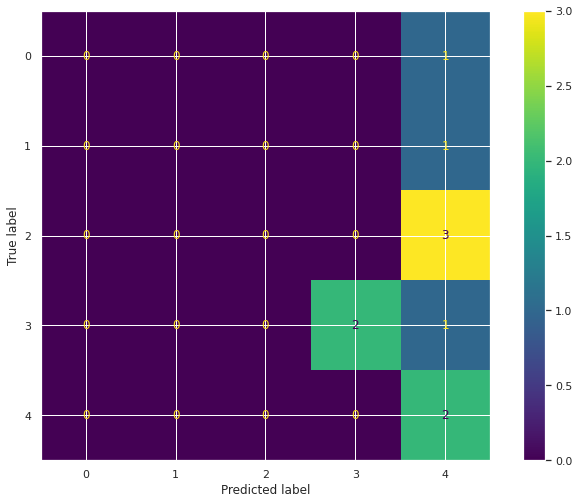

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))
plot_confusion_matrix(adaBoost,x_test,y_test)

**Bagging Classifier model**

In [ ]:
from sklearn.ensemble import BaggingClassifier
BClassifier=BaggingClassifier()
BClassifier.fit(x_train,y_train)

BaggingClassifier()

In [ ]:
y_pred_BClassifier=BClassifier.predict(x_test)

In [ ]:
print("Accuracy score for Bagging Classifier: ",accuracy_score(y_pred_BClassifier,y_test)*100)

Accuracy score for Bagging Classifier:  80.0


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         2
           2       0.33      0.33      0.33         3
           3       0.00      0.00      0.00         1
           4       1.00      0.50      0.67         4

    accuracy                           0.30        10
   macro avg       0.27      0.17      0.20        10
weighted avg       0.50      0.30      0.37        10



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Func

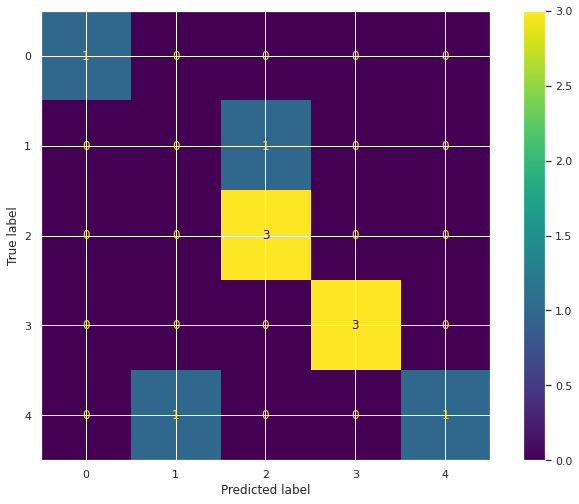

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
print(classification_report(y_pred,y_test))
plot_confusion_matrix(BClassifier,x_test,y_test)

**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_predDT = dtc.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy score:",accuracy_score(y_predDT,y_test)*100)


Accuracy score: 60.0


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         2
           2       0.33      0.33      0.33         3
           3       0.00      0.00      0.00         1
           4       1.00      0.50      0.67         4

    accuracy                           0.30        10
   macro avg       0.27      0.17      0.20        10
weighted avg       0.50      0.30      0.37        10



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Func

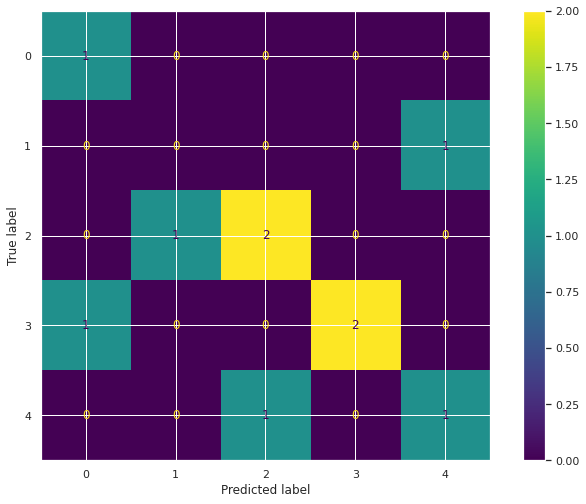

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
print(classification_report(y_pred,y_test))
plot_confusion_matrix(dtc,x_test,y_test)